# Example: Machine Learning of Interpretation of coefficients of linear models

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py
    
In linear models, the target value is modeled as a linear combination of the features.

Coefficients in multiple linear models represent the relationship between the given feature, $X_i$, and the target, $y$., 
assuming that all the other features remain constant (conditional dependence).

This is different from plotting $X_i$ versus $y$ and fitting a linear relationship: 
in that case all possible values of the other features are taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear models, 
pointing at problems that arise when either the linear model is not appropriate to describe the dataset, 
or when features are correlated.


# Current Population Survey

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py
    
We will use data from the “Current Population Survey” from 1985 to predict wage as a function of various features,
such as experience, age, or education.

- The dataset: wages
- The machine-learning pipeline
- Processing the dataset
- Interpreting coefficients: scale matters
- Checking the variability of the coefficients
- The problem of correlated variables
- Preprocessing numerical variables
- Linear models with regularization
- Linear models with sparse coefficients

# Datasets: Wages

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages
    
We fetch the data from OpenML. Note that setting the parameter as_frame to True will retrieve the data as a pandas dataframe.

Then, we identify features X and targets y: the column WAGE is our target variable (i.e., the variable which we want to predict).
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
    
The Scikit-learn includes the Pandas with describe() function which privide the max(), min(), and etc. 

In [4]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
X.describe(include="all")

EDUCATION SOUTH   SEX  EXPERIENCE       UNION         AGE   RACE  \
count   534.000000   534   534  534.000000         534  534.000000    534   
unique         NaN     2     2         NaN           2         NaN      3   
top            NaN    no  male         NaN  not_member         NaN  White   
freq           NaN   378   289         NaN         438         NaN    440   
mean     13.018727   NaN   NaN   17.822097         NaN   36.833333    NaN   
std       2.615373   NaN   NaN   12.379710         NaN   11.726573    NaN   
min       2.000000   NaN   NaN    0.000000         NaN   18.000000    NaN   
25%      12.000000   NaN   NaN    8.000000         NaN   28.000000    NaN   
50%      12.000000   NaN   NaN   15.000000         NaN   35.000000    NaN   
75%      15.000000   NaN   NaN   26.000000         NaN   44.000000    NaN   
max      18.000000   NaN   NaN   55.000000         NaN   64.000000    NaN   

       OCCUPATION SECTOR     MARR  
count         534    534      534  
unique          6      3        2  
top         Other  Other  Married  
freq          156    411      350  
mean          NaN    NaN      NaN  
std           NaN    NaN      NaN  
min           NaN    NaN      NaN  
25%           NaN    NaN      NaN  
50%           NaN    NaN      NaN  
75%           NaN    NaN      NaN  
max           NaN    NaN      NaN

# Note:

The dataset contains categorical and numerical variables. 

We will need to take this into account when preprocessing the dataset thereafter.

# Display Feature Names

In [5]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
X.head()

EDUCATION SOUTH     SEX  EXPERIENCE       UNION   AGE      RACE OCCUPATION  \
0        8.0    no  female        21.0  not_member  35.0  Hispanic      Other   
1        9.0    no  female        42.0  not_member  57.0     White      Other   
2       12.0    no    male         1.0  not_member  19.0     White      Other   
3       12.0    no    male         4.0  not_member  22.0     White      Other   
4       12.0    no    male        17.0  not_member  35.0     White      Other   

          SECTOR       MARR  
0  Manufacturing    Married  
1  Manufacturing    Married  
2  Manufacturing  Unmarried  
3          Other  Unmarried  
4          Other    Married

# Display Target 

Our target for prediction: the wage. Wages are described as floating-point number in dollars per hour.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html

values: Convert the DataFrame into values.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ravel.html

ravel(): Convert DataFrame the into flatten ndarray.

In [10]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]

y = survey.target.values.ravel()
print('survey.target[:5]:')
print(survey.target[:5])
print()
print('survey.target.values[:5]:')
print(survey.target.values[:5])
print()
print('survey.target.values.ravel()[:5]:')
print(survey.target.values.ravel()[:5])
print()
print('y[:5]:')
print(y[:5])

survey.target[:5]:
0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

survey.target.values[:5]:
[5.1  4.95 6.67 4.   7.5 ]

survey.target.values.ravel()[:5]:
[5.1  4.95 6.67 4.   7.5 ]

y[:5]:
[5.1  4.95 6.67 4.   7.5 ]


# Split the Dataset into Train and Test Dataset

In [12]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()

# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
print('X_train[:5]:')
print(X_train[:5])
print()

print('X_test[:5]:')
print(X_test[:5])
print()

print('y_train[:5]:')
print(y_train[:5])
print()

print('y_test[:5]:')
print(y_test[:5])

X_train[:5]:
     EDUCATION SOUTH     SEX  EXPERIENCE       UNION   AGE   RACE  \
204       16.0    no  female         6.0  not_member  28.0  White   
196       16.0    no  female        26.0  not_member  48.0  White   
510       17.0    no  female        14.0  not_member  37.0  White   
19        12.0    no    male        33.0  not_member  51.0  White   
361       16.0    no    male        21.0  not_member  43.0  White   

       OCCUPATION         SECTOR     MARR  
204    Management  Manufacturing  Married  
196    Management          Other  Married  
510  Professional          Other  Married  
19          Other          Other  Married  
361       Service          Other  Married  

X_test[:5]:
     EDUCATION SOUTH     SEX  EXPERIENCE       UNION   AGE   RACE OCCUPATION  \
222       12.0    no  female        45.0  not_member  63.0  White      Sales   
131       12.0    no    male         3.0  not_member  21.0  White      Other   
149       13.0   yes    male         7.0  not_member  2

# Plot teh Pair to Pair by seaborn

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages

In [20]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()

# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

# PLot the pair to pair by seaborn for X_train and y_train
import seaborn as sns
import matplotlib.pyplot as plt

train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
# hist: histgogram, kde: Kernel density estimator
print("diag_kind='kde':")
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')
plt.show()
#print("diag_kind='hist':")
#_ = sns.pairplot(train_dataset, kind='reg', diag_kind='hist')
#plt.show()
#print("diag_kind='auto':")
#_ = sns.pairplot(train_dataset, kind='reg', diag_kind='auto')
#plt.show()

diag_kind='kde':


# Note: 

Looking closely at the relations of Age, Experience, Education, and WAGE distribution reveals that it has a long tail. 

For this reason, we should take its logarithm to turn it approximately into a normal distribution (linear models such as ridge or lasso work best for a normal distribution of error).

The WAGE is increasing when EDUCATION is increasing. Note that the dependence between WAGE and EDUCATION represented here is a marginal dependence, i.e., it describes the behavior of a specific variable without keeping the others fixed.

Also, the EXPERIENCE and AGE are strongly linearly correlated.

# The machine-learning pipeline

To design our machine-learning pipeline, we first manually check the type of data that we are dealing with:


In [19]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    float64 
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    float64 
 4   UNION       534 non-null    category
 5   AGE         534 non-null    float64 
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), float64(3)
memory usage: 17.1 KB


# Pre-processor: One-Hot Encoding

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages
    
As seen previously, the dataset contains columns with different data types and 
we need to apply a specific preprocessing for each data types. 

In particular categorical variables cannot be included in linear model if not coded as integers first. 

In addition, to avoid categorical features to be treated as ordered values, we need to one-hot-encode them. 

Our pre-processor will

- one-hot encode (i.e., generate a column by category) the categorical columns;
- as a first approach (we will see after how the normalisation of numerical values will affect our discussion), 
keep numerical values as they are.

To describe the dataset as a linear model,
we use a ridge regressor with a very small regularization and to model the logarithm of the WAGE.

# Why is One-Hot Encoder?

https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179
    
On-Hot encode converts the labeling from a number into binary categorizing. 

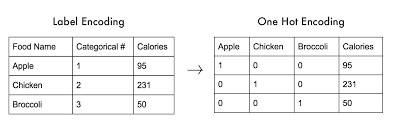

In [3]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)
print('preprocessor:')
print(preprocessor)

preprocessor:
ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['RACE', 'OCCUPATION', 'SECTOR', 'MARR',
                                  'UNION', 'SEX', 'SOUTH'])])


# Ridge Regressor

To describe the dataset as a linear model we use a ridge regressor with a very small regularization and to model the logarithm of the WAGE.

In [7]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()

# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

print('model:', model)

model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['RACE', 'OCCUPATION',
                                                   'SECTOR', 'MARR', 'UNION',
                                                   'SEX', 'SOUTH'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])


# Processing the dataset

First, we fit the model.

_ = model.fit(X_train, y_train)

Then we check the performance of the computed model plotting its predictions on the test set and 
computing, for example, the median absolute error of the model.

In [12]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

_ = model.fit(X_train, y_train)

from sklearn.metrics import median_absolute_error

y_pred = model.predict(X_train)

# Check the abosute error: y_train and y_pred
# Plot y_test and y_pred
mae = median_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f} $/hour'
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f} $/hour'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title('Ridge model with very small alpha (=1e-10) regularization')
plt.ylabel('y_pred (Model predictions)')
plt.xlabel('y_test')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

# Note:

The model learnt is far from being a good model making accurate predictions: 

this is obvious when looking at the plot above, where good predictions should lie on the red line.

In the following section, we will interpret the coefficients of the model. 

While we do so, we should keep in mind that any conclusion we draw is about the model that we build, 
rather than about the true (real-world) generative process of the data.

# Interpreting coefficients: scale matters

First of all, 
we can take a look to the values of the coefficients of the regressor we have fitted.

- Input Data: X_train, y_train
- Output Coefficient:

In [14]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

_ = model.fit(X_train, y_train)

feature_names = (model.named_steps['columntransformer']
                      .named_transformers_['onehotencoder']
                      .get_feature_names(input_features=categorical_columns))
feature_names = np.concatenate(
    [feature_names, numerical_columns])

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=feature_names
)
print('coefs:')
coefs

coefs:


Coefficients
RACE_Hispanic               -0.013550
RACE_Other                  -0.009106
RACE_White                   0.022563
OCCUPATION_Clerical          0.000055
OCCUPATION_Management        0.090538
OCCUPATION_Other            -0.025091
OCCUPATION_Professional      0.071974
OCCUPATION_Sales            -0.046626
OCCUPATION_Service          -0.091043
SECTOR_Construction         -0.000139
SECTOR_Manufacturing         0.031313
SECTOR_Other                -0.030967
MARR_Unmarried              -0.032405
UNION_not_member            -0.117154
SEX_male                     0.090808
SOUTH_yes                   -0.033823
EDUCATION                    0.054699
EXPERIENCE                   0.035005
AGE                         -0.030867

# Plot Coefficients of Features for Small Regularization (alpha)

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#id4
    
The AGE coefficient is expressed in “dollars/hour per living years” while the EDUCATION one is expressed in “dollars/hour per years of education”. 

This representation of the coefficients has the benefit of making clear the practical predictions of the model: 

an increase of 1 year in AGE means a decrease of 0.030867 dollars/hour, 
while an increase of 1 year in EDUCATION means an increase of 0.054699 dollars/hour. 

On the other hand, 
categorical variables (as UNION or SEX) are adimensional numbers taking either the value 0 or 1. 

Their coefficients are expressed in dollars/hour. 

Then, we cannot compare the magnitude of different coefficients 
since the features have different natural scales, 
and hence value ranges, because of their different unit of measure. 
    
This is more visible if we plot the coefficients.

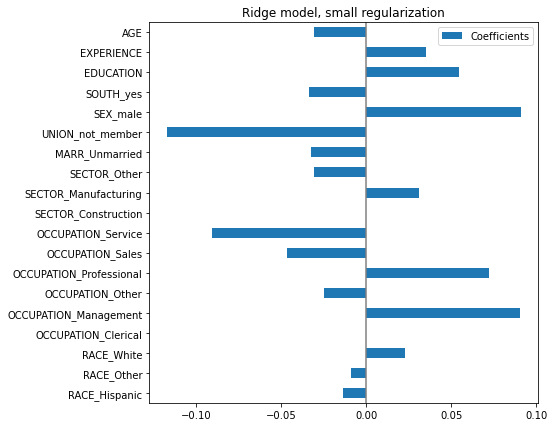

In [16]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

_ = model.fit(X_train, y_train)

feature_names = (model.named_steps['columntransformer']
                      .named_transformers_['onehotencoder']
                      .get_feature_names(input_features=categorical_columns))
feature_names = np.concatenate(
    [feature_names, numerical_columns])

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Scale Experience and Age for more Impact

Indeed, from the plot above the most important factor in 
determining WAGE appears to be the variable UNION, 
even if our intuition might tell us that variables like EXPERIENCE should have more impact.

Looking at the coefficient plot to gauge feature importance can be misleading as 
some of them vary on a small scale, while others, like AGE, varies a lot more, several decades.

This is visible if we compare the standard deviations of different features.

In [20]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

# Scale the Age and Experience with standard deviation
# Axis = 0 is for vertical top to bottom.
# Age and Experience have the biggest (Wide spread) scale in standard devition.
X_train_preprocessed = pd.DataFrame(
    model.named_steps['columntransformer'].transform(X_train),
    columns=feature_names
)

X_train_preprocessed.std(axis=0).plot(kind='barh', figsize=(9, 7))
plt.title('Features std. dev.')
plt.subplots_adjust(left=.3)

Multiplying the coefficients by the standard deviation of the related feature would reduce all the coefficients to the same unit of measure. 

As we will see after this is equivalent to normalize numerical variables to their standard deviation, as

$$ y = \sum{coef_i \times X_i} =
\sum{(coef_i \times std_i) \times (X_i / std_i)}$$.

In that way, we emphasize that the greater the variance of a feature, the larger the weight of the corresponding coefficient on the output, all else being equal.

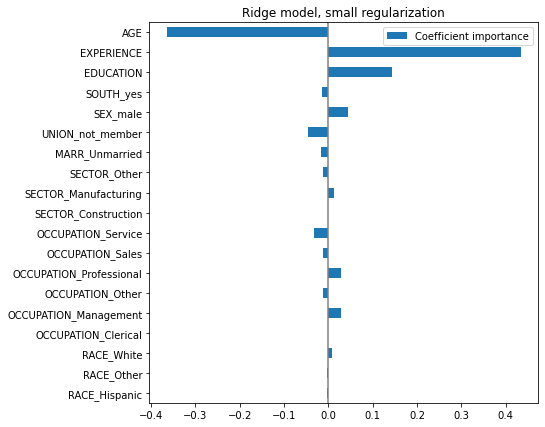

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

# Divide the cofficient by standard devition.
# Age has negative effect.
# Experience and Education has positive effect.
coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_ *
    X_train_preprocessed.std(axis=0),
    columns=['Coefficient importance'], index=feature_names
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Age is Negative, Experience and Education are Positive

Now that the coefficients have been scaled, we can safely compare them.

Warning Why does the plot above suggest that an increase in age leads to a decrease in wage? 

Why the initial pairplot is telling the opposite?

The plot above tells us about dependencies between a specific feature and 
the target when all other features remain constant, i.e., conditional dependencies. 

An increase of the AGE will induce a decrease of the WAGE when all other features remain constant. 

On the contrary, an increase of the EXPERIENCE will induce an increase of the WAGE 
when all other features remain constant. 

Also, AGE, EXPERIENCE and EDUCATION are the three variables that most influence the model.


# Box-Plot Age, Experience, and Education Coefficient.
## Checking the variability of the coefficients

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages
    
We can check the coefficient variability through cross-validation: 
it is a form of data perturbation (related to resampling).

If coefficients vary significantly when changing the input dataset their robustness '
is not guaranteed, and they should probably be interpreted with caution.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_ *
    X_train_preprocessed.std(axis=0),
    columns=['Coefficient importance'], index=feature_names
)
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1
)
coefs = pd.DataFrame(
    [est.named_steps['transformedtargetregressor'].regressor_.coef_ *
     X_train_preprocessed.std(axis=0)
     for est in cv_model['estimator']],
    columns=feature_names
)
plt.figure(figsize=(9, 7))
# Plot the point crowded together. Use stripplot instead.
#sns.swarmplot(data=coefs, orient='h', color='k', alpha=0.5)
sns.stripplot(data=coefs, orient='h', color='k', alpha=0.5)
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

# Age and Experience Coefficients are Correlated

Age and Experience Coefficients are Correlated. They are difficult to separated.

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages
    
## The problem of correlated variables

## Why Age and Experience go Opposite Direction?
## Something was wrong.

The AGE and EXPERIENCE coefficients are affected by strong variability 
which might be due to the collinearity between the 2 features: 
as AGE and EXPERIENCE vary together in the data, their effect is difficult to tease apart.

To verify this interpretation we plot the variability of the AGE and EXPERIENCE coefficient.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_ *
    X_train_preprocessed.std(axis=0),
    columns=['Coefficient importance'], index=feature_names
)
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1
)
coefs = pd.DataFrame(
    [est.named_steps['transformedtargetregressor'].regressor_.coef_ *
     X_train_preprocessed.std(axis=0)
     for est in cv_model['estimator']],
    columns=feature_names
)

# Plot the Age vs. Expeirience Effect of Coefficient
plt.ylabel('Age coefficient')
plt.xlabel('Experience coefficient')
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title('Co-variations of coefficients for AGE and EXPERIENCE '
              'across folds')

# Drop and Age and PLot Box Plot for Experience

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages
    
Two regions are populated: when the EXPERIENCE coefficient is positive the AGE 
one is negative and viceversa.

To go further we remove one of the 2 features and check what is the impact on the model stability.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
column_to_drop = ['AGE']

cv_model = cross_validate(
    model, X.drop(columns=column_to_drop), y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1
)
coefs = pd.DataFrame(
    [est.named_steps['transformedtargetregressor'].regressor_.coef_ *
     X_train_preprocessed.drop(columns=column_to_drop).std(axis=0)
     for est in cv_model['estimator']],
    columns=feature_names[:-1]
)
plt.figure(figsize=(9, 7))
#sns.swarmplot(data=coefs, orient='h', color='k', alpha=0.5)
sns.stripplot(data=coefs, orient='h', color='k', alpha=0.5)
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.title('Coefficient importance and its variability')
plt.xlabel('Coefficient importance')
plt.subplots_adjust(left=.3)

# Remove the Negative Age Effect and Plot

The estimation of the EXPERIENCE coefficient is now less variable and 
remain important for all models trained during cross-validation.

# Preprocessing Numerical Variables

## Normalized Features Variables

As said above (see “The machine-learning pipeline”), 
we could also choose to scale numerical values before training the model. 

This can be useful to apply a similar amount regularization to all of them in the Ridge. 

The preprocessor is redefined in order to subtract the mean and scale variables to unit variance.

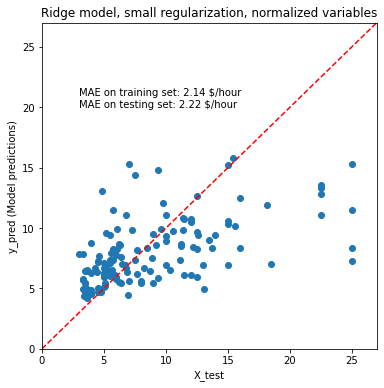

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

from sklearn.preprocessing import StandardScaler

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder='passthrough'
)

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

_ = model.fit(X_train, y_train)

y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f} $/hour'
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f} $/hour'
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title('Ridge model, small regularization, normalized variables')
plt.ylabel('y_pred (Model predictions)')
plt.xlabel('X_test')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

# Plot Coefficient Again with Normalized Data

For the coefficient analysis, scaling is not needed this time.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=feature_names
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Plot Normalized Coefficient and K-Fold Cross-validation

We now inspect the coefficients across several cross-validation folds.

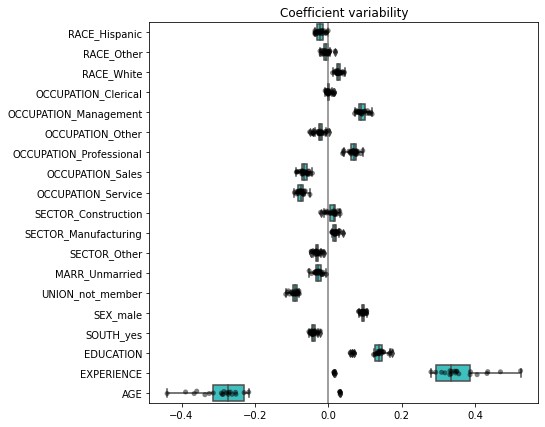

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

# K-Fold Cross-Validation
cv_model = cross_validate(
    model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1
)
coefs = pd.DataFrame(
    [est.named_steps['transformedtargetregressor'].regressor_.coef_
     for est in cv_model['estimator']],
    columns=feature_names
)
plt.figure(figsize=(9, 7))
#sns.swarmplot(data=coefs, orient='h', color='k', alpha=0.5)
sns.stripplot(data=coefs, orient='h', color='k', alpha=0.5)
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.title('Coefficient variability')
plt.subplots_adjust(left=.3)

# Normalized Coefficient for Rigid Linear Regression 

Normalized Coefficient for Rigid Linear Regression and K-Fold Validation

The result is quite similar to the non-normalized case.

## Linear models with regularization

In machine-learning practice, Ridge Regression is more often used with non-negligible regularization.

Above, we limited this regularization to a very little amount. Regularization improves the conditioning of the problem and reduces the variance of the estimates. RidgeCV applies cross validation in order to determine which value of the regularization parameter (alpha) is best suited for prediction.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

# Ridge Linear Regression
from sklearn.linear_model import RidgeCV

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=np.logspace(-10, 10, 21)),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

_ = model.fit(X_train, y_train)
model[-1].regressor_.alpha_

10.0

# Ridge Linear Regression and K-Fold Cross-Validation

Quality check for Ridge Linear Regression and K-Fold Cross-Validation

Then we check the quality of the predictions.

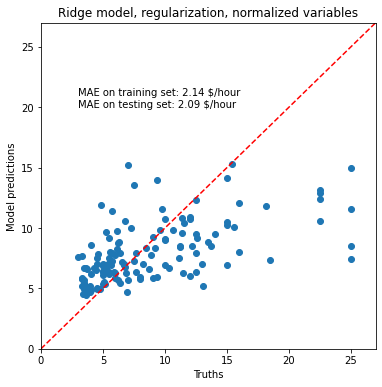

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f} $/hour'
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f} $/hour'

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title('Ridge model, regularization, normalized variables')
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])


# Coefficient Plot

## Ridge Linear Regression and K-Fold Cross-Validation

The ability to reproduce the data of the regularized model is similar to the 
one of the non-regularized model.

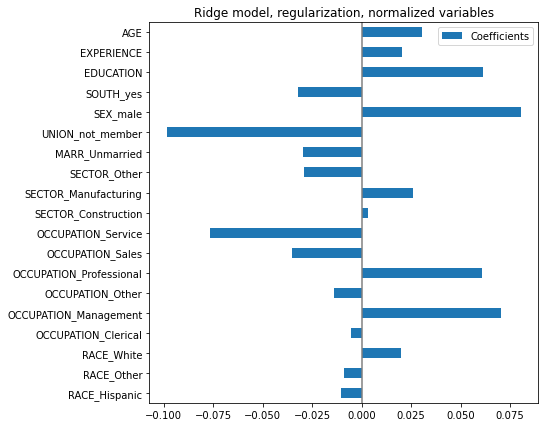

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=feature_names
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


# Age vs Experience Plot

## Rigid Linear Regression with K-Fold Cross-Validation

The coefficients are significantly different. 

AGE and EXPERIENCE coefficients are both positive but they now have less influence on the prediction.

The regularization reduces the influence of correlated variables on the model 
because the weight is shared between the two predictive variables, 
so neither alone would have strong weights.

On the other hand, the weights obtained with regularization are more stable. 

This increased stability is visible from the plot, obtained from data perturbations, 
in a cross validation. 

This plot can be compared with the previous one.

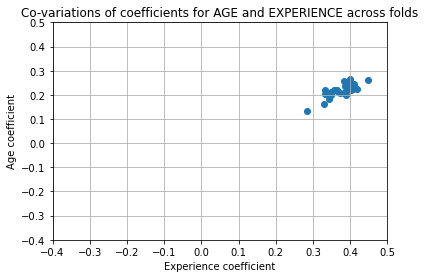

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

cv_model = cross_validate(
    model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1
)
coefs = pd.DataFrame(
    [est.named_steps['transformedtargetregressor'].regressor_.coef_ *
     X_train_preprocessed.std(axis=0)
     for est in cv_model['estimator']],
    columns=feature_names
)

plt.ylabel('Age coefficient')
plt.xlabel('Experience coefficient')
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title('Co-variations of coefficients for AGE and EXPERIENCE '
              'across folds')

# Linear models with sparse coefficients

## LASSO Linear Regression Model

Below example uses LASSO (Least Absolute Shrinkage and Selection OPerator) Linear Regression Model
instead of Ridge Linear Regression Model

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-dataset-wages
    
Another possibility to take into account correlated variables in the dataset, 
is to estimate sparse coefficients.

In some way we already did it manually when we dropped the AGE column in a previous Ridge estimation.

Lasso models (see the Lasso User Guide section) estimates sparse coefficients. 

LassoCV applies cross validation in order to determine which value of the 
regularization parameter (alpha) is best suited for the model estimation.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

from sklearn.linear_model import LassoCV

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=np.logspace(-10, 10, 21), max_iter=100000),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

_ = model.fit(X_train, y_train)
model[-1].regressor_.alpha_

0.001

# Plot y_pred vs. X_test with LASSO Linear Regression Model

Then we check the quality of the predictions.

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#id5

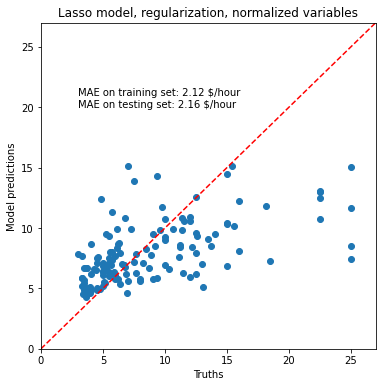

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f} $/hour'
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f} $/hour'

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title('Lasso model, regularization, normalized variables')
plt.ylabel('y_pred (Model predictions)')
plt.xlabel('X_test (Truths)')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

In [ ]:
# Plot Cofficient of Lasso

For our dataset, again the model is not very predictive.

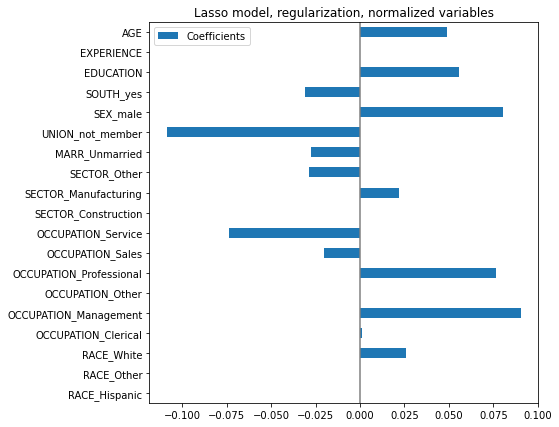

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)
X = survey.data[survey.feature_names]
y = survey.target.values.ravel()
# Split Dataset into Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=feature_names
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Age and Experience in LASSO

## Experience Scale is suppressed.

A Lasso model identifies the correlation between AGE and EXPERIENCE and 
suppresses one of them for the sake of the prediction.

It is important to keep in mind that the coefficients that have been dropped may still be 
related to the outcome by themselves: 
the model chose to suppress them because they bring little or no additional information 
on top of the other features. 

Additionally, this selection is unstable for correlated features, and should be interpreted 
with caution.


# Discussion

Coefficients must be scaled to the same unit of measure to retrieve feature importance. 

Scaling them with the standard-deviation of the feature is a useful proxy.

Coefficients in multivariate linear models represent the dependency between a given feature 
and the target, conditional on the other features.

Correlated features induce instabilities in the coefficients of linear models 
and their effects cannot be well teased apart.

Different linear models respond differently to feature correlation 
and coefficients could significantly vary from one another.

Inspecting coefficients across the folds of a cross-validation loop gives an idea of their stability.